In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [66]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/pruebaSBS/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/pruebaSBS/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [67]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malignf,list_bigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.000000,0.000000,"[tax bill, originally sold, little known, know...","[Baikalfinansgroup, Rosneft]",1.0,0.625000,0.250000,1.0,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,3,1,...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.600000,0.000000,"[tax bill, originally sold, little known, know...","[Yuganskneftegaz cost, Yuganskneftegaz cost 27...",0.0,0.750000,0.000000,1.0,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,7,1,...,Empty DataFrame Columns: [] Index: [loraine{lo...,0.555556,0.000000,"[Loraine, Loraine, London, United Kingdom]",[London],1.0,0.750000,0.000000,1.0,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.500000,0.000000,"[town girl, followed earlier, earlier films, f...","[Sennett, Extra Girl was produced Sennett ]",0.0,0.875000,0.000000,0.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,4,0,...,"die{die,VERB} die_...",0.250000,0.080000,"[bus collision, Uganda]","[bus collision, Uganda]",1.0,0.750000,0.500000,0.5,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,6,0,...,"wants{want,...",0.285714,0.038462,"[grading papers, understand answers, answers w...","[Haque, Haque wants to include English in some...",0.5,0.541667,0.666667,1.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,6,0,...,...,0.538462,0.026316,"[South African, African iron, steel manufactur...","[South African, African steel, steel manufactu...",0.6,0.812500,0.000000,1.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,6,0,...,has_been...,0.375000,0.031250,"[Critics said, main qualification, high school...","[NCEA, NCEA has been degraded authority ]",0.0,0.500000,0.500000,0.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,6,0,...,"Empty DataFrame Columns: [] Index: [two{two,NU...",0.375000,0.000000,"[pleaded guilty, aggravated assault, obstruct ...",[Tyler Jackson],1.0,0.700000,0.600000,1.0,NO


<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

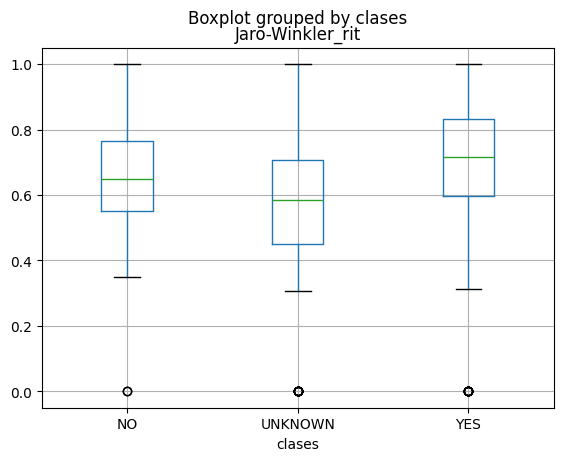

In [68]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [69]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["list_relaciones","listas_malignf","listas_malign","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,5,0,43,0.000000,0.000000,1.0,0.625000,0.250000,1.0,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,3,1,...,6,0,42,0.600000,0.000000,0.0,0.750000,0.000000,1.0,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,7,1,...,10,0,47,0.555556,0.000000,1.0,0.750000,0.000000,1.0,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,7,0,66,0.500000,0.000000,0.0,0.875000,0.000000,0.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,4,0,...,9,2,25,0.250000,0.080000,1.0,0.750000,0.500000,0.5,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,6,0,...,8,1,26,0.285714,0.038462,0.5,0.541667,0.666667,1.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,6,0,...,14,1,38,0.538462,0.026316,0.6,0.812500,0.000000,1.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,6,0,...,9,1,32,0.375000,0.031250,0.0,0.500000,0.500000,0.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,6,0,...,9,0,33,0.375000,0.000000,1.0,0.700000,0.600000,1.0,NO


In [70]:
train.columns
#sumas	distancias	entropias	mutinf	list_comp	list_incomp	bi_ent_trip_rel	Jaro-Winkler_rit	

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'similitud_faltantes', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram',
       'diferencias', 'bi_ent_trip_rel', 'Jaro-Winkler_rit', 'nomatch',
       'entidades', 'clases'],
      dtype='object')

In [71]:
#train=train.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,5,0,43,0.000000,0.000000,1.0,0.625000,0.250000,1.0,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,3,1,...,6,0,42,0.600000,0.000000,0.0,0.750000,0.000000,1.0,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,7,1,...,10,0,47,0.555556,0.000000,1.0,0.750000,0.000000,1.0,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,7,0,66,0.500000,0.000000,0.0,0.875000,0.000000,0.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,4,0,...,9,2,25,0.250000,0.080000,1.0,0.750000,0.500000,0.5,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,6,0,...,8,1,26,0.285714,0.038462,0.5,0.541667,0.666667,1.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,6,0,...,14,1,38,0.538462,0.026316,0.6,0.812500,0.000000,1.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,6,0,...,9,1,32,0.375000,0.031250,0.0,0.500000,0.500000,0.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,6,0,...,9,0,33,0.375000,0.000000,1.0,0.700000,0.600000,1.0,NO


In [72]:
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.071,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,5,0,43,0.000000,0.000000,1.0,0.625000,0.250000,1.0,YES
1,0.000000,0.000000,1.877,0.000,0.000000e+00,0.000000,0.000000,1.000000,3,1,...,6,0,42,0.600000,0.000000,0.0,0.750000,0.000000,1.0,NO
2,0.000000,0.000000,2.703,0.000,0.000000e+00,0.000000,0.000000,1.000000,7,1,...,10,0,47,0.555556,0.000000,1.0,0.750000,0.000000,1.0,UNKNOWN
3,0.000000,0.000000,2.632,0.000,0.000000e+00,0.000000,0.000000,1.000000,4,0,...,7,0,66,0.500000,0.000000,0.0,0.875000,0.000000,0.5,YES
4,-0.221468,276.119690,2.530,1.132,2.044573e+00,0.001367,0.115592,-0.106360,4,0,...,9,2,25,0.250000,0.080000,1.0,0.750000,0.500000,0.5,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.501920,156.604034,2.689,2.565,4.006609e+00,0.002715,0.576517,0.293338,6,0,...,8,1,26,0.285714,0.038462,0.5,0.541667,0.666667,1.0,UNKNOWN
796,2.915811,132.309708,2.440,1.688,3.952492e+00,0.002748,0.231415,0.175794,6,0,...,14,1,38,0.538462,0.026316,0.6,0.812500,0.000000,1.0,YES
797,0.000000,145.867004,2.544,0.000,1.521449e-12,0.000000,0.000000,0.000000,6,0,...,9,1,32,0.375000,0.031250,0.0,0.500000,0.500000,0.0,UNKNOWN
798,0.000000,0.000000,2.617,0.000,0.000000e+00,0.000000,0.000000,1.000000,6,0,...,9,0,33,0.375000,0.000000,1.0,0.700000,0.600000,1.0,NO


In [73]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [74]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [75]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades
sumas,1.000000,0.373185,0.169634,0.784486,0.754255,0.271749,0.796227,-0.343853,-0.063083,0.030811,NaN,0.060344,0.399738,0.249669,-0.234430,0.208673,-0.267445,-0.170856,0.189191,-0.209732
distancias,0.373185,1.000000,0.117280,0.556011,0.455536,0.259178,0.393218,-0.337663,0.140260,0.220033,NaN,0.437250,0.973595,-0.028427,-0.373636,0.855109,-0.354109,-0.323893,0.367193,-0.331125
entropia_total,0.169634,0.117280,1.000000,0.152263,0.125454,0.064409,0.146668,0.029434,0.079412,0.108581,NaN,0.227734,0.124436,-0.015772,-0.015520,0.122754,-0.124602,0.033987,0.038273,-0.097650
entropias,0.784486,0.556011,0.152263,1.000000,0.968469,0.402138,0.929130,-0.621351,-0.078670,0.046785,NaN,0.076743,0.586109,-0.083960,-0.356628,0.514804,-0.334510,-0.244933,0.288489,-0.287085
mutinf,0.754255,0.455536,0.125454,0.968469,1.000000,0.391978,0.928087,-0.671872,-0.098431,0.009387,NaN,0.020632,0.477683,-0.084346,-0.315779,0.425504,-0.289983,-0.205325,0.241621,-0.248069
mearts,0.271749,0.259178,0.064409,0.402138,0.391978,1.000000,0.346165,-0.391690,-0.078202,0.027065,NaN,0.003144,0.278527,-0.132763,-0.168529,0.297252,-0.160576,-0.114537,0.144679,-0.168632
max_info,0.796227,0.393218,0.146668,0.929130,0.928087,0.346165,1.000000,-0.541171,-0.105142,-0.017817,NaN,-0.005463,0.419951,-0.063256,-0.283718,0.366796,-0.261066,-0.163986,0.200708,-0.231889
similitud_faltantes,-0.343853,-0.337663,0.029434,-0.621351,-0.671872,-0.391690,-0.541171,1.000000,0.069126,-0.001066,NaN,-0.017814,-0.344504,0.000331,0.264386,-0.281986,0.189055,0.135771,-0.171383,0.180243
list_comp,-0.063083,0.140260,0.079412,-0.078670,-0.098431,-0.078202,-0.105142,0.069126,1.000000,0.106680,NaN,0.766004,0.138559,0.075259,0.055520,0.069154,0.098981,-0.020216,-0.010726,0.008251
list_incomp,0.030811,0.220033,0.108581,0.046785,0.009387,0.027065,-0.017817,-0.001066,0.106680,1.000000,NaN,0.185545,0.235792,-0.017087,-0.284585,0.224221,-0.221256,-0.187951,0.194844,-0.196573


<Axes: >

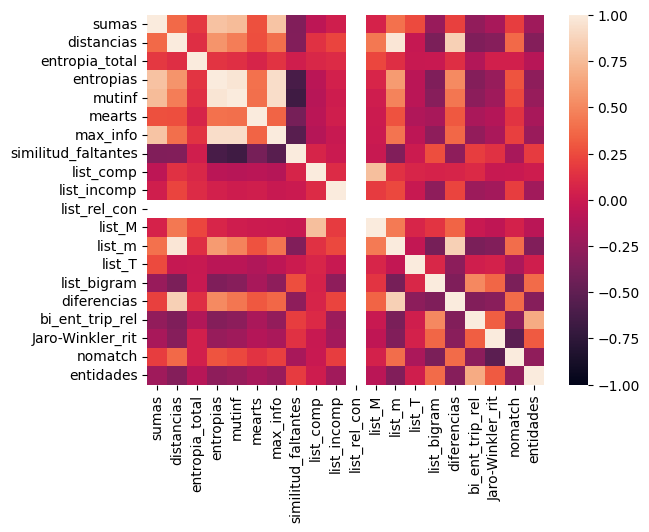

In [76]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [77]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades
sumas,1.000000,0.373185,0.169634,0.784486,0.754255,0.271749,0.796227,-0.343853,-0.063083,0.030811,NaN,0.060344,0.399738,0.249669,-0.234430,0.208673,-0.267445,-0.170856,0.189191,-0.209732
distancias,0.373185,1.000000,0.117280,0.556011,0.455536,0.259178,0.393218,-0.337663,0.140260,0.220033,NaN,0.437250,0.973595,-0.028427,-0.373636,0.855109,-0.354109,-0.323893,0.367193,-0.331125
entropia_total,0.169634,0.117280,1.000000,0.152263,0.125454,0.064409,0.146668,0.029434,0.079412,0.108581,NaN,0.227734,0.124436,-0.015772,-0.015520,0.122754,-0.124602,0.033987,0.038273,-0.097650
entropias,0.784486,0.556011,0.152263,1.000000,0.968469,0.402138,0.929130,-0.621351,-0.078670,0.046785,NaN,0.076743,0.586109,-0.083960,-0.356628,0.514804,-0.334510,-0.244933,0.288489,-0.287085
mutinf,0.754255,0.455536,0.125454,0.968469,1.000000,0.391978,0.928087,-0.671872,-0.098431,0.009387,NaN,0.020632,0.477683,-0.084346,-0.315779,0.425504,-0.289983,-0.205325,0.241621,-0.248069
mearts,0.271749,0.259178,0.064409,0.402138,0.391978,1.000000,0.346165,-0.391690,-0.078202,0.027065,NaN,0.003144,0.278527,-0.132763,-0.168529,0.297252,-0.160576,-0.114537,0.144679,-0.168632
max_info,0.796227,0.393218,0.146668,0.929130,0.928087,0.346165,1.000000,-0.541171,-0.105142,-0.017817,NaN,-0.005463,0.419951,-0.063256,-0.283718,0.366796,-0.261066,-0.163986,0.200708,-0.231889
similitud_faltantes,-0.343853,-0.337663,0.029434,-0.621351,-0.671872,-0.391690,-0.541171,1.000000,0.069126,-0.001066,NaN,-0.017814,-0.344504,0.000331,0.264386,-0.281986,0.189055,0.135771,-0.171383,0.180243
list_comp,-0.063083,0.140260,0.079412,-0.078670,-0.098431,-0.078202,-0.105142,0.069126,1.000000,0.106680,NaN,0.766004,0.138559,0.075259,0.055520,0.069154,0.098981,-0.020216,-0.010726,0.008251
list_incomp,0.030811,0.220033,0.108581,0.046785,0.009387,0.027065,-0.017817,-0.001066,0.106680,1.000000,NaN,0.185545,0.235792,-0.017087,-0.284585,0.224221,-0.221256,-0.187951,0.194844,-0.196573


In [78]:
# Checar variables colineales
#sns.relplot(data=train_m, x="list_incomp", y="list_comp")

In [79]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [80]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

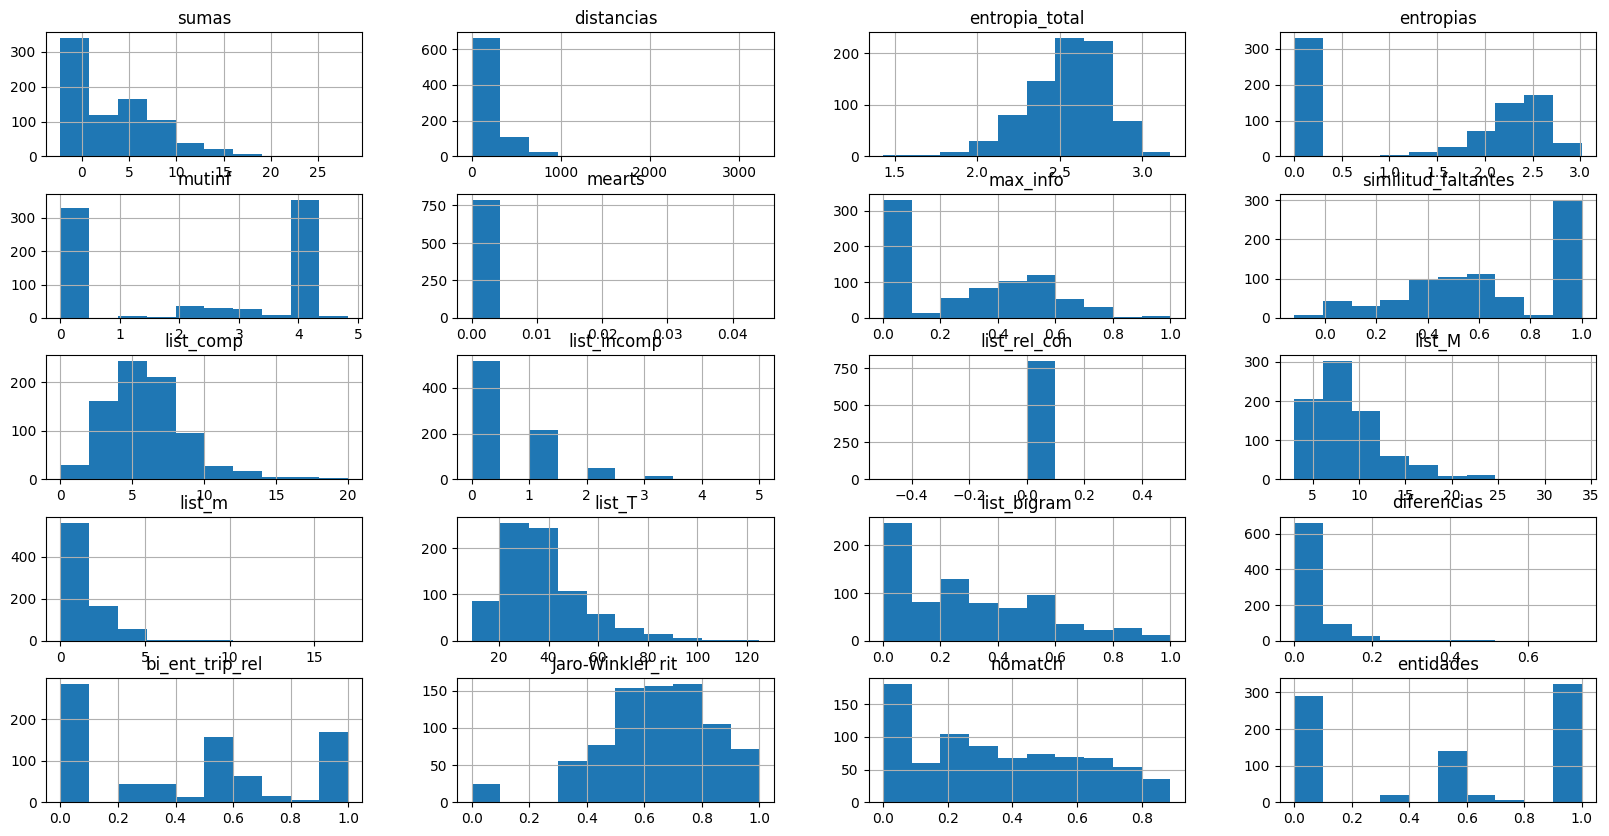

In [81]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [82]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/pruebaSBS/GHS/GHS_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/pruebaSBS/GHS/GHS_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [83]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malignf,list_bigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.535,0.000,0.000000,0.000000,0.000000,1.000000,7,1,...,Empty DataFrame Columns: [] Index: [israel{isr...,0.000000,0.000000,"[British firm, work scheme, solve chronic, chr...","[British firm, aid jobless, Israel]",0.666667,0.500000,0.500000,1.000000,ENTAILMENT
1,3.441459,2868.089844,2.675,2.619,3.316399,0.009668,0.356003,0.768742,23,0,...,betfair{bet...,0.000000,1.470588,[suspicious races],"[security department, unusual betting, betting...",0.000000,0.314516,0.870968,0.000000,NONENTAILMENT
2,5.280052,1194.567261,2.583,2.425,3.559684,0.002379,0.358144,0.623523,12,3,...,association{associ...,0.047619,0.250000,"[truth approaches, mental peak, Baker]","[closely tracks, rapid progress, hurdling rank...",0.250000,0.562500,0.625000,0.500000,NONENTAILMENT
3,0.000000,0.000000,2.696,0.000,0.000000,0.000000,0.000000,1.000000,6,1,...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.142857,0.000000,"[premium rate, rate phone, phone services, tel...","[scrutinize regulation, premium rate, rate cal...",0.500000,0.678571,0.142857,1.000000,ENTAILMENT
4,2.223866,1779.916504,2.866,2.688,3.675601,0.003088,0.332273,0.516043,20,5,...,"haiku{haiku,NOUN} f...",0.000000,1.133333,"[contain playful, quizzical words, Ben Somewhe...","[like form, texts reminded, early songs, brief...",0.000000,0.315217,0.869565,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.534966,1476.658203,2.552,2.150,2.802523,0.001959,0.227980,0.162765,19,3,...,"30{30,NU...",0.000000,0.285714,"[expansion plans, chief executive, temporary b...","[joint venture, cable company, public service,...",0.125000,0.423077,0.653846,0.166667,NONENTAILMENT
796,7.477303,445.711975,2.801,2.839,4.002126,0.002690,0.462773,0.424251,3,0,...,push{pus...,0.125000,0.068182,"[possibly imminent, imminent indictment, war c...","[War crimes, crimes indictment, push teetering...",0.200000,0.662500,0.375000,1.000000,ENTAILMENT
797,3.317456,2417.119141,2.635,2.641,4.000118,0.002838,0.392823,0.541833,13,1,...,"i{I,PRON} enjoy...",0.000000,0.566667,"[new season, season looms, Johnson, Johnson ci...","[different sort, championship titles, Johnson,...",0.166667,0.325000,0.850000,0.166667,NONENTAILMENT
798,3.948713,1132.847046,2.314,2.292,3.093504,0.002105,0.339266,0.624623,18,3,...,"even{even,ADV} 3...",0.071429,0.243243,"[days later, forbidding razor, razor wire, rei...","[said yesterday, demonstrators arrived, main g...",0.000000,0.345238,0.809524,0.142857,NONENTAILMENT


In [84]:
test=test.drop(["list_relaciones","listas_malignf","listas_malign","bi_ent_trip_t","bi_ent_trip_h"],axis=1)


In [85]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.535,0.000,0.000000,0.000000,0.000000,1.000000,7,1,...,7,0,27,0.000000,0.000000,0.666667,0.500000,0.500000,1.000000,ENTAILMENT
1,3.441459,2868.089844,2.675,2.619,3.316399,0.009668,0.356003,0.768742,23,0,...,48,25,17,0.000000,1.470588,0.000000,0.314516,0.870968,0.000000,NONENTAILMENT
2,5.280052,1194.567261,2.583,2.425,3.559684,0.002379,0.358144,0.623523,12,3,...,22,9,36,0.047619,0.250000,0.250000,0.562500,0.625000,0.500000,NONENTAILMENT
3,0.000000,0.000000,2.696,0.000,0.000000,0.000000,0.000000,1.000000,6,1,...,8,0,19,0.142857,0.000000,0.500000,0.678571,0.142857,1.000000,ENTAILMENT
4,2.223866,1779.916504,2.866,2.688,3.675601,0.003088,0.332273,0.516043,20,5,...,41,17,15,0.000000,1.133333,0.000000,0.315217,0.869565,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.534966,1476.658203,2.552,2.150,2.802523,0.001959,0.227980,0.162765,19,3,...,33,10,35,0.000000,0.285714,0.125000,0.423077,0.653846,0.166667,NONENTAILMENT
796,7.477303,445.711975,2.801,2.839,4.002126,0.002690,0.462773,0.424251,3,0,...,9,3,44,0.125000,0.068182,0.200000,0.662500,0.375000,1.000000,ENTAILMENT
797,3.317456,2417.119141,2.635,2.641,4.000118,0.002838,0.392823,0.541833,13,1,...,31,17,30,0.000000,0.566667,0.166667,0.325000,0.850000,0.166667,NONENTAILMENT
798,3.948713,1132.847046,2.314,2.292,3.093504,0.002105,0.339266,0.624623,18,3,...,29,9,37,0.071429,0.243243,0.000000,0.345238,0.809524,0.142857,NONENTAILMENT


In [86]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_M,list_m,list_T,list_bigram,diferencias,bi_ent_trip_rel,Jaro-Winkler_rit,nomatch,entidades,clases
0,0.000000,0.000000,2.535,0.000,0.000000,0.000000,0.000000,1.000000,7,1,...,7,0,27,0.000000,0.000000,0.666667,0.500000,0.500000,1.000000,ENTAILMENT
1,3.441459,2868.089844,2.675,2.619,3.316399,0.009668,0.356003,0.768742,23,0,...,48,25,17,0.000000,1.470588,0.000000,0.314516,0.870968,0.000000,NONENTAILMENT
2,5.280052,1194.567261,2.583,2.425,3.559684,0.002379,0.358144,0.623523,12,3,...,22,9,36,0.047619,0.250000,0.250000,0.562500,0.625000,0.500000,NONENTAILMENT
3,0.000000,0.000000,2.696,0.000,0.000000,0.000000,0.000000,1.000000,6,1,...,8,0,19,0.142857,0.000000,0.500000,0.678571,0.142857,1.000000,ENTAILMENT
4,2.223866,1779.916504,2.866,2.688,3.675601,0.003088,0.332273,0.516043,20,5,...,41,17,15,0.000000,1.133333,0.000000,0.315217,0.869565,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.534966,1476.658203,2.552,2.150,2.802523,0.001959,0.227980,0.162765,19,3,...,33,10,35,0.000000,0.285714,0.125000,0.423077,0.653846,0.166667,NONENTAILMENT
796,7.477303,445.711975,2.801,2.839,4.002126,0.002690,0.462773,0.424251,3,0,...,9,3,44,0.125000,0.068182,0.200000,0.662500,0.375000,1.000000,ENTAILMENT
797,3.317456,2417.119141,2.635,2.641,4.000118,0.002838,0.392823,0.541833,13,1,...,31,17,30,0.000000,0.566667,0.166667,0.325000,0.850000,0.166667,NONENTAILMENT
798,3.948713,1132.847046,2.314,2.292,3.093504,0.002105,0.339266,0.624623,18,3,...,29,9,37,0.071429,0.243243,0.000000,0.345238,0.809524,0.142857,NONENTAILMENT


In [87]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [88]:
# RTE3
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [89]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [90]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.6533123 , ..., 0.625     , 0.28125   ,
        1.        ],
       [0.        , 0.        , 0.59211356, ..., 0.75      , 0.        ,
        1.        ],
       [0.        , 0.        , 0.85268139, ..., 0.75      , 0.        ,
        1.        ],
       ...,
       [0.        , 0.04520946, 0.80252366, ..., 0.5       , 0.5625    ,
        0.        ],
       [0.        , 0.        , 0.82555205, ..., 0.7       , 0.675     ,
        1.        ],
       [0.27580775, 0.03806496, 0.82239748, ..., 0.77083333, 0.375     ,
        1.        ]])

In [91]:
X_train.shape

(800, 20)

In [92]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [93]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [94]:
model.decision_function(X_train)

array([ 1.05449946e+00,  7.73853319e-01,  1.62000247e+00,  8.67806946e-01,
        1.65515684e-01, -5.32316789e-02, -8.11398346e-02,  2.52858514e-01,
        3.75516832e-01, -2.96076744e-01,  2.38670766e-01,  6.18567916e-01,
        1.26254187e+00,  4.78687171e-01, -9.36717304e-01,  5.18581609e-01,
        2.58646637e-01, -5.96876141e-01,  4.92433087e-01,  6.27391608e-01,
        1.36176643e+00, -6.53469906e-01,  8.88247138e-01,  7.42354276e-01,
        5.39995294e-01,  1.34727160e+00, -4.98847495e-02,  1.57767161e-03,
       -8.71783940e-02, -3.56383256e-01,  2.73079321e-01,  9.05514244e-01,
        3.24519896e-02,  6.20705516e-01, -1.60952187e-01, -1.16451278e+00,
        9.09118427e-01,  8.16336493e-01,  7.11521978e-01,  1.61039992e+00,
        5.63310826e-01,  9.41916993e-01,  7.14684686e-01,  1.17963357e+00,
       -9.97857374e-01, -2.37542328e-01, -2.18619340e-01,  1.02094860e+00,
        9.92037095e-01,  2.60060907e-01, -5.39577604e-01,  6.47258778e-01,
        1.10274007e+00,  

In [95]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'similitud_faltantes', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram',
       'diferencias', 'bi_ent_trip_rel', 'Jaro-Winkler_rit', 'nomatch',
       'entidades'],
      dtype='object')

In [96]:
model.classes_

array([0, 1])

In [97]:
model.coef_[0]

array([ 0.78644856, -0.9684489 ,  0.02772062, -0.29347387, -0.59307564,
        0.03862878,  0.6162648 , -0.10385036, -0.23094251, -0.75209819,
        0.        ,  0.55488273, -1.29350625,  0.50279114,  0.31624858,
       -0.08088375,  0.81377807,  0.50574516, -1.4522164 ,  0.39194076])

In [98]:
coeficientes=model.coef_[0]

In [99]:
coeficientes

array([ 0.78644856, -0.9684489 ,  0.02772062, -0.29347387, -0.59307564,
        0.03862878,  0.6162648 , -0.10385036, -0.23094251, -0.75209819,
        0.        ,  0.55488273, -1.29350625,  0.50279114,  0.31624858,
       -0.08088375,  0.81377807,  0.50574516, -1.4522164 ,  0.39194076])

In [100]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  16 bi_ent_trip_rel 18 nomatch


In [101]:
n_columns=train.shape[1]-1

In [102]:
n_columns

20

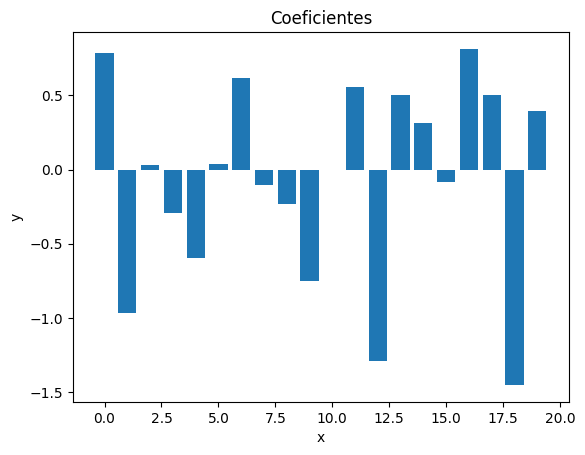

In [103]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [104]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.80629771, ..., 0.5       , 0.51851852,
        1.        ],
       [0.26938368, 0.42965777, 0.85082697, ..., 0.31451613, 0.90322581,
        0.        ],
       [0.41330145, 0.17895364, 0.82156489, ..., 0.5625    , 0.64814815,
        0.5       ],
       ...,
       [0.25967727, 0.36209955, 0.83810433, ..., 0.325     , 0.88148148,
        0.16666667],
       [0.30908953, 0.16970756, 0.73600509, ..., 0.3452381 , 0.83950617,
        0.14285714],
       [0.16200571, 0.08235233, 0.79452926, ..., 0.38333333, 0.76049383,
        0.        ]])

In [105]:
X_test.shape

(800, 20)

In [106]:
predictions = model.predict(X_test)

In [107]:
print(confusion_matrix(y_test, predictions))

[[393   8]
 [222 177]]


In [108]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.71
precision:  0.96
recall 0.44
f1_score:  0.61
matthews_score:  0.5


In [109]:
X_train.shape

(800, 20)

In [110]:
X_test.shape

(800, 20)

In [111]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [112]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [113]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.810000 (0.172432)
Logistic Regression Precision:: 0.810000 (0.164042)
Logistic Regression Recall:: 0.880000 (0.149853)
Logistic Regression F1-score:: 0.830000 (0.146384)


In [64]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.540000 (0.281570)


In [199]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [200]:
#linear_model

In [201]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [202]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.61      0.99      0.75       401
           1       0.96      0.36      0.52       399

    accuracy                           0.67       800
   macro avg       0.78      0.67      0.63       800
weighted avg       0.78      0.67      0.64       800



In [203]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [204]:
test.columns[:-1]

Index(['distancias', 'entropias', 'list_comp', 'list_incomp',
       'bi_ent_trip_rel', 'Jaro-Winkler_rit', 'nomatch', 'entidades'],
      dtype='object')

In [205]:
explainer.expected_value

-0.07504344590973422

In [206]:
X_test

array([[0.        , 0.        , 0.16666667, ..., 0.5       , 0.51851852,
        1.        ],
       [0.42965777, 0.88152137, 0.54761905, ..., 0.31451613, 0.90322581,
        0.        ],
       [0.17895364, 0.81622349, 0.28571429, ..., 0.5625    , 0.64814815,
        0.5       ],
       ...,
       [0.36209955, 0.88892629, 0.30952381, ..., 0.325     , 0.88148148,
        0.16666667],
       [0.16970756, 0.77145742, 0.42857143, ..., 0.3452381 , 0.83950617,
        0.14285714],
       [0.08235233, 0.75934029, 0.4047619 , ..., 0.38333333, 0.76049383,
        0.        ]])

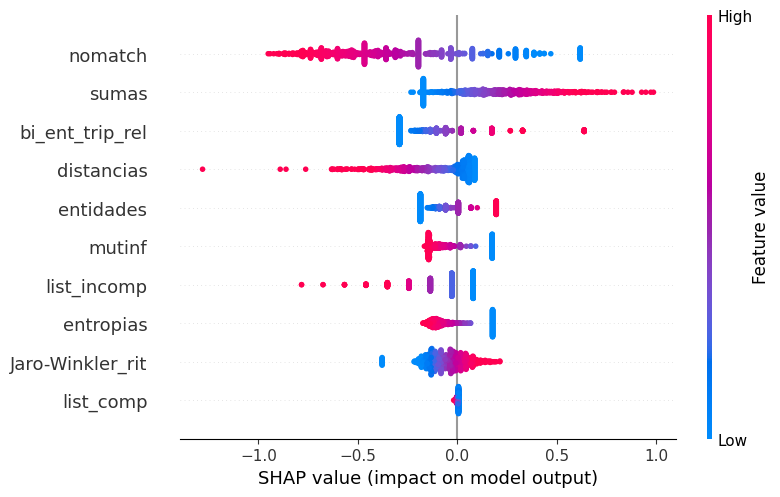

In [82]:
shap.plots.beeswarm(shap_values)

[0.18670504 0.07878892 0.54533594 0.76360656 0.82276753 0.04861899
 0.4109464  0.32388638 0.22222222 0.         0.20689655 0.07692308
 0.30275229 0.2        0.07459207 0.66666667 0.9        0.21818182
 1.        ] 0 1


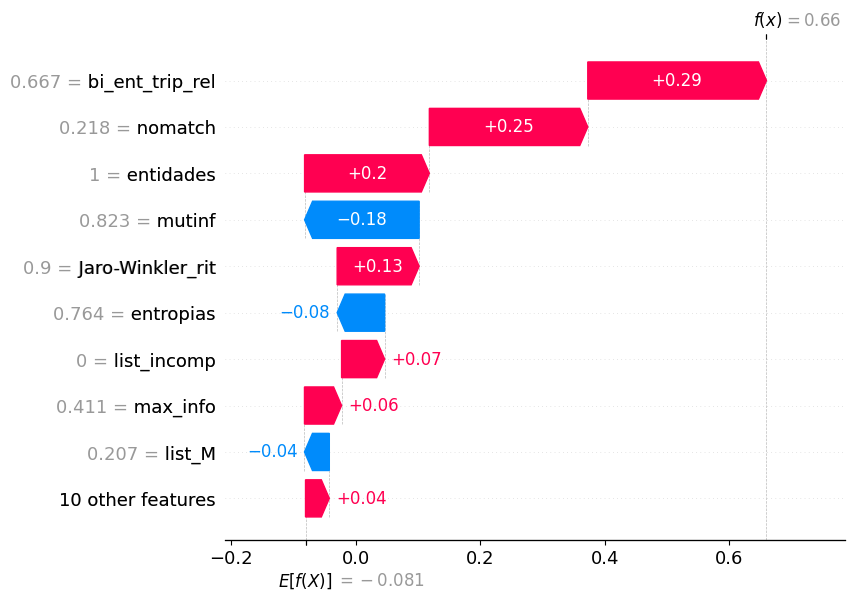

In [93]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [94]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.73026745 0.         0.         0.
 0.         1.         0.38888889 0.         0.24137931 0.
 0.30275229 0.33333333 0.         0.66666667 0.95       0.
 1.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

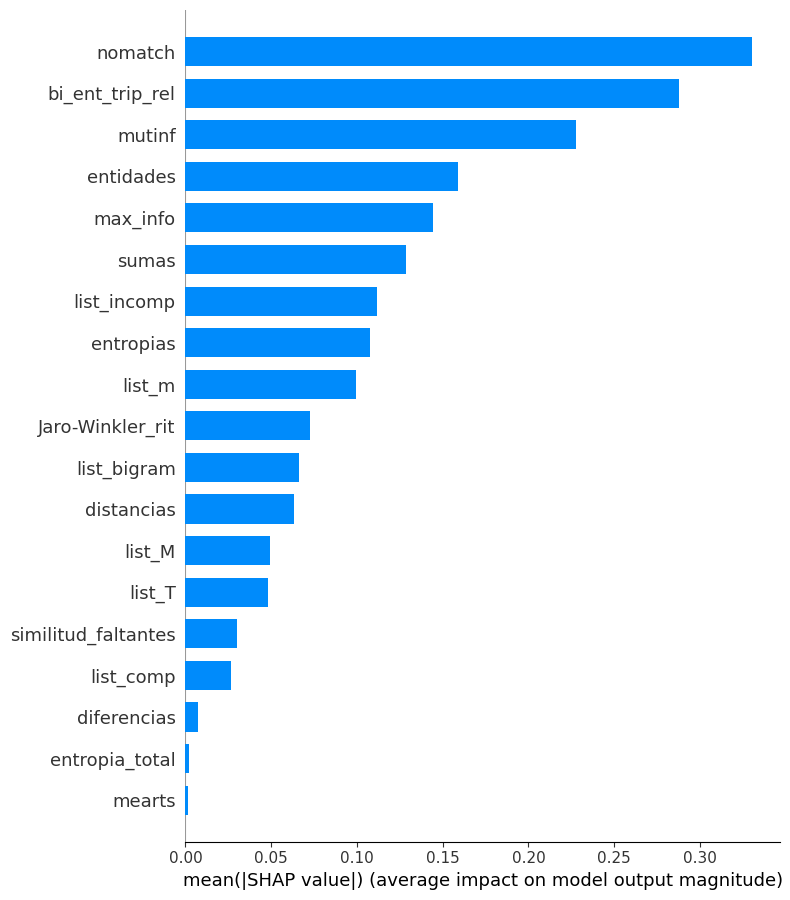

In [95]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

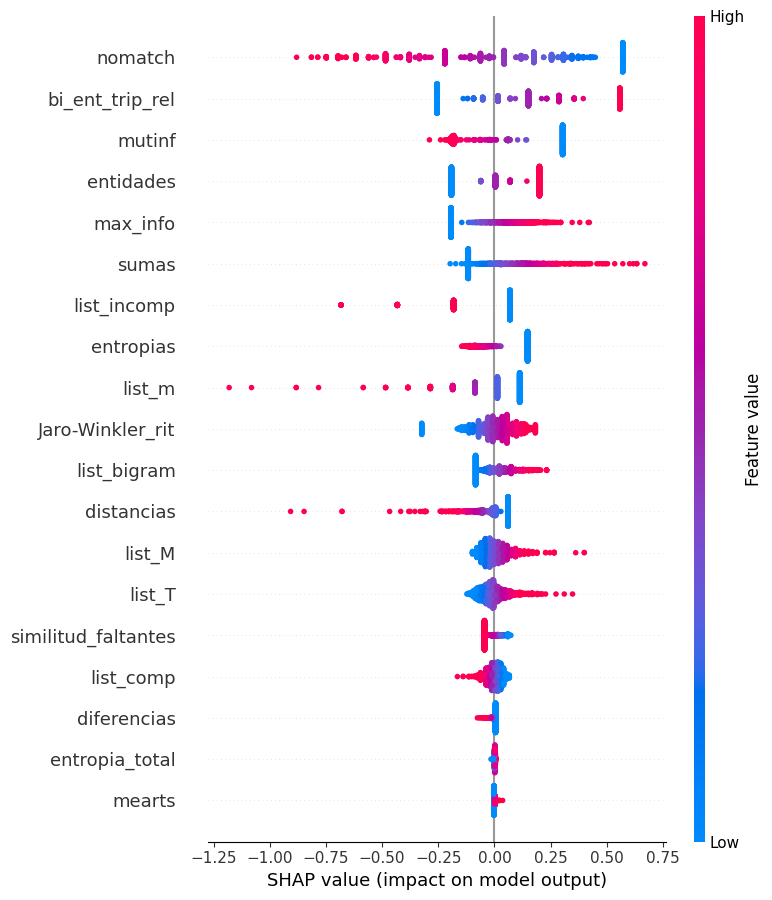

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

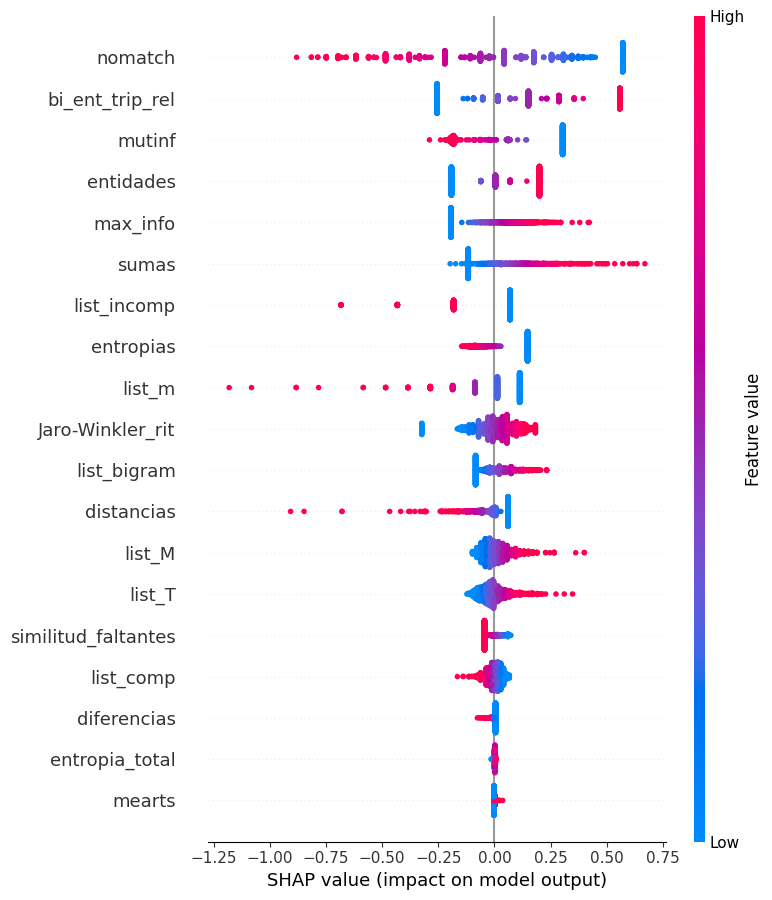

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

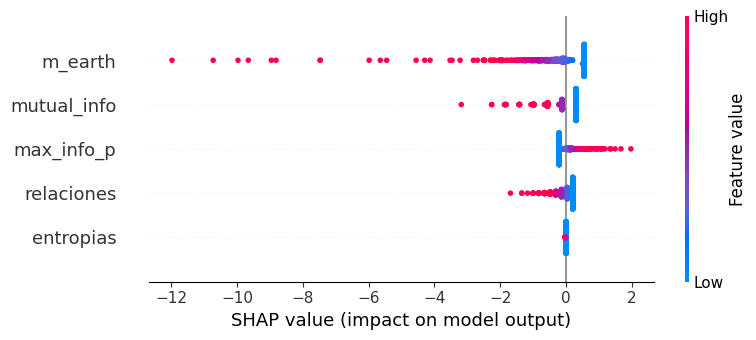

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


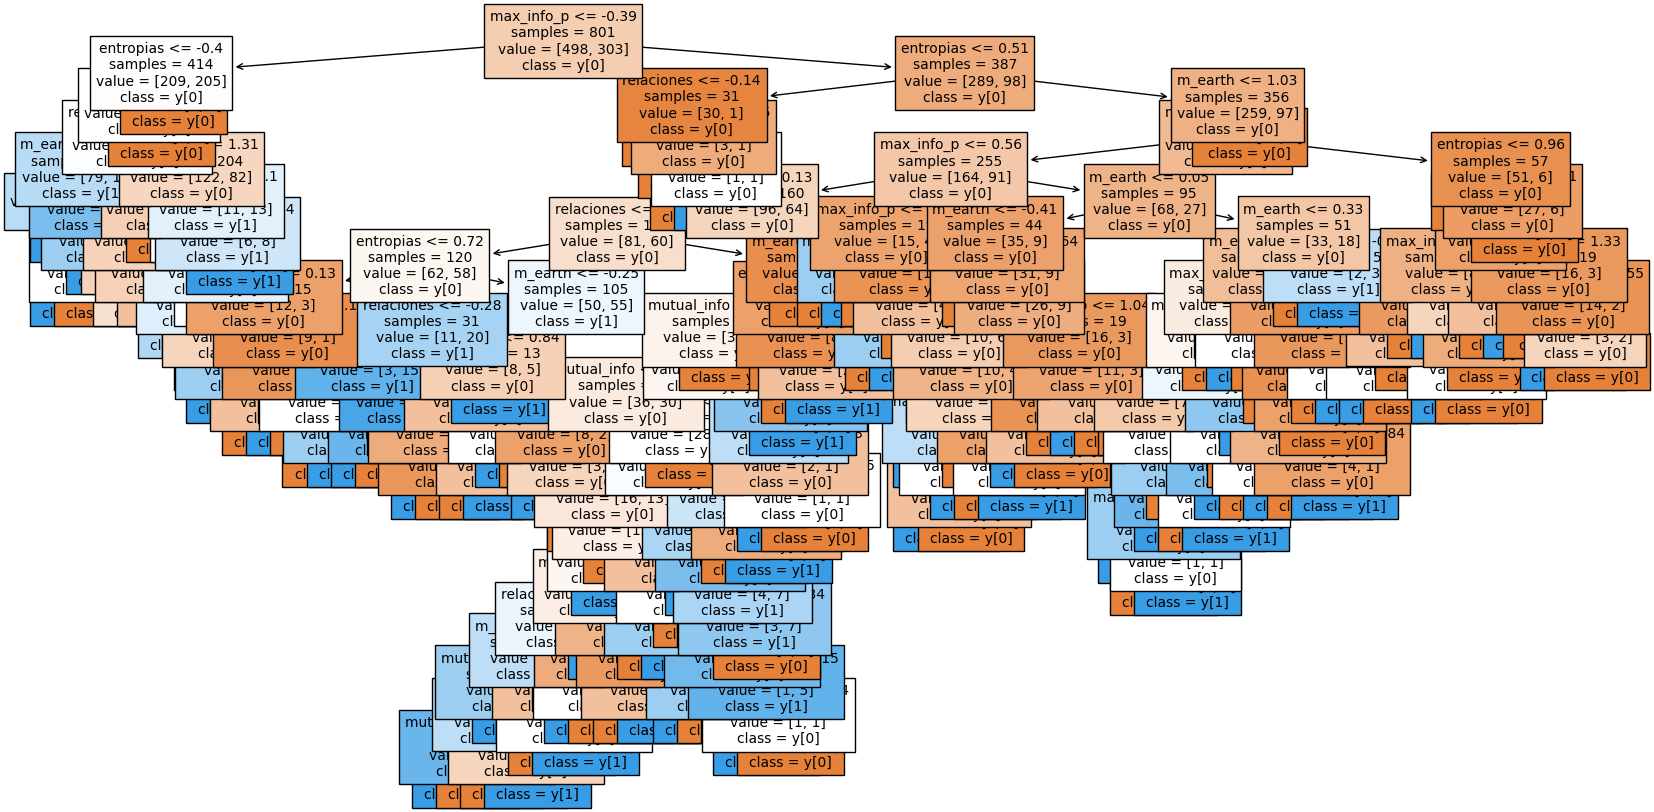

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )